In [1]:
####### Import Necessary Modules ############
import MDAnalysis as md
import MDAnalysis.analysis.distances as ds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
####### Load the Trajectories and Select the Relevant Atoms #############
u1 = md.Universe('pull-v-0-1.gro', 'pull-v-0-1-c.xtc') #first trajectory (0.1 nm/ps)
at1 = u1.select_atoms("protein") #select only the protein atoms (not the solvent)
res1_1 = at1.select_atoms("resid 8439 and name CA") #CA atom in first protein residue
res2_1 = at1.select_atoms("resid 8451 and name CA") #CA atom in final protein residue

In [3]:
##### Same Process for 0.01 nm/ps trajectory  #######
u2 = md.Universe('pull-v-0-1.gro','pull-v-0-01-c.xtc') 
at2 = u2.select_atoms("protein")
res1_2 = at2.select_atoms("resid 8439 and name CA")
res2_2 = at2.select_atoms("resid 8451 and name CA")

In [4]:
##### Same Process for 0.001 nm/ps trajectory ########
u3 = md.Universe('pull-v-0-001.gro','pull-v-0-001-c.xtc')
at3 = u3.select_atoms("protein")
res1_3 = at3.select_atoms("resid 8439 and name CA")
res2_3 = at3.select_atoms("resid 8451 and name CA")

In [5]:
##### Same process for  0.0001 nm/ps trajectory #######
u4 = md.Universe('pull-v-0-0001.gro','pull-v-0-0001-c.xtc')
at4 = u4.select_atoms("protein")
res1_4 = at4.select_atoms("resid 8439 and name CA")
res2_4 = at4.select_atoms("resid 8451 and name CA")

In [8]:
##### For 1st trajectory (0.1 nm/ps) calculate Radius of Gyration and End-to-End Distances #######

Rgyr1 = [] #empty list for inputting radius of gyration data
end_to_end_1_norm = [] # empty list for inputting end-to-end distances

for ts in u1.trajectory: #go through each step in the trajectory
    Rgyr1.append((u1.trajectory.time, at1.radius_of_gyration())) #to Rgyr1 add time step value and radius of gyration
    e2e = ds.dist(res1_1, res2_1) #calculate end-to-end distance
    end_to_end_1_norm.append((u1.trajectory.time, e2e[2,0])) #append the time step and distance to end_to_end_1_norm

#convert lists into numpy arrays
Rgyr1 = np.array(Rgyr1)
end_to_end_1_norm = np.array(end_to_end_1_norm)

In [9]:
#### Same for other trajectories ###########

## 0.01 nm/ps ##
Rgyr2 = []
end_to_end_2_norm = []

for ts in u2.trajectory:
    Rgyr2.append((u2.trajectory.time, at2.radius_of_gyration()))
    e2e = ds.dist(res1_2, res2_2)
    end_to_end_2_norm.append((u2.trajectory.time, e2e[2,0]))

## 0.001 nm/ps ##
Rgyr3 =[]
end_to_end_3_norm = []

for ts in u3.trajectory:
    Rgyr3.append((u3.trajectory.time, at3.radius_of_gyration()))
    e2e = ds.dist(res1_3, res2_3)
    end_to_end_3_norm.append((u3.trajectory.time, e2e[2,0]))

## 0.0001 nm/ps ##
Rgyr4 = []
end_to_end_4_norm = []

for ts in u4.trajectory:
    Rgyr4.append((u4.trajectory.time, at4.radius_of_gyration()))
    xyz = ds.dist(res1_4, res2_4)
    end_to_end_4_norm.append((u4.trajectory.time, xyz[2,0]))

## converts lists to arrays ##
Rgyr2 = np.array(Rgyr2)
Rgyr3 = np.array(Rgyr3)
Rgyr4 = np.array(Rgyr4)

end_to_end_1_norm = np.array(end_to_end_1_norm)
end_to_end_2_norm = np.array(end_to_end_2_norm)
end_to_end_3_norm = np.array(end_to_end_3_norm)
end_to_end_4_norm = np.array(end_to_end_4_norm)

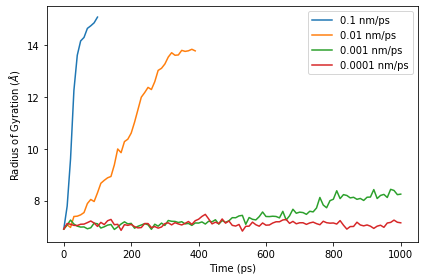

In [10]:
#### Plot Radii of Gyration vs Time For all 4 Trajectories #####

### Recall RgyrN[:,0] are times, RgyrN[:, 1] are Radii of Gyration (N =  1, 2, 3, 4)####

plt.plot(Rgyr1[:,0], Rgyr1[:,1], label ='0.1 nm/ps') #0.1 nm/ps traj
plt.plot(Rgyr2[:,0], Rgyr2[:,1], label ='0.01 nm/ps') #0.01 nm/ps 
plt.plot(Rgyr3[:,0], Rgyr3[:,1], label ='0.001 nm/ps') #0.001 nm/ps
plt.plot(Rgyr4[:,0], Rgyr4[:,1], label ='0.0001 nm/ps') #0.0001 nm/ps

plt.legend() #add legend

plt.xlabel('Time (ps)') #X axis label
plt.ylabel('Radius of Gyration ($\AA$)') #Y axis label

plt.tight_layout() #make sure no labels etc. overlap

plt.show()

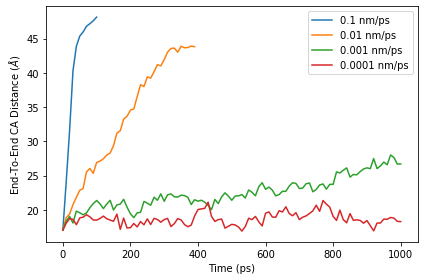

In [11]:
#### Plot End-To-End distances vs. Time for all trajectories ####

### Recall end_to_end_N_norm[:,0] are times, end_to_end_N_norm[:,1] are the distance (N =  1, 2, 3, 4)####

# steps exactly the same as for Radius of Gyration #

plt.plot(end_to_end_1_norm[:,0], end_to_end_1_norm[:,1], label = '0.1 nm/ps')
plt.plot(end_to_end_2_norm[:,0], end_to_end_2_norm[:,1], label = '0.01 nm/ps')
plt.plot(end_to_end_3_norm[:,0], end_to_end_3_norm[:,1], label = '0.001 nm/ps')
plt.plot(end_to_end_4_norm[:,0], end_to_end_4_norm[:,1], label = '0.0001 nm/ps')

plt.legend()

plt.xlabel('Time (ps)')
plt.ylabel('End-To-End CA Distance ($\AA$)')

plt.tight_layout()

plt.show()

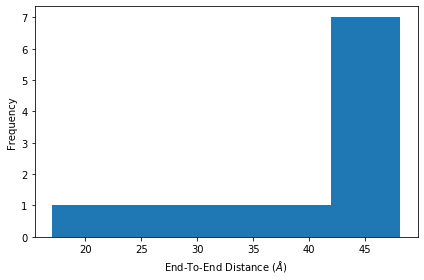

In [12]:
#### Histogram Plot of End-To-End Distances for 0.1 nm/ps trajectory ####

len1 = len(end_to_end_1_norm) #number of datapoints in trajectory 

plt.hist(end_to_end_1_norm[:,1], bins = int(len1/2)) #histogram data with number of bins equal to half the number of datapoints

#usual labels and layout 

plt.xlabel('End-To-End Distance ($\AA$)')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

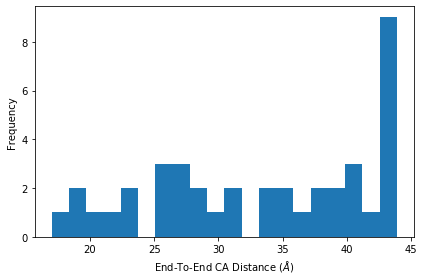

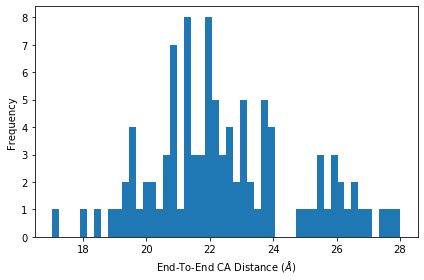

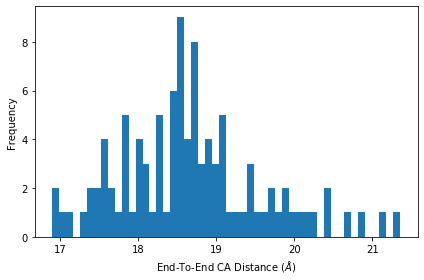

In [14]:
#### Same for other trajectories #####

len2 = len(end_to_end_2_norm)
len3 = len(end_to_end_3_norm)
len4 = len(end_to_end_4_norm)

plt.hist(end_to_end_2_norm[:,1], bins = int(len2/2))
plt.xlabel('End-To-End CA Distance ($\AA$)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.hist(end_to_end_3_norm[:,1], bins = int(len3/2))
plt.xlabel('End-To-End CA Distance ($\AA$)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.hist(end_to_end_4_norm[:,1], bins = int(len4/2))
plt.xlabel('End-To-End CA Distance ($\AA$)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [19]:
### Computing Averages ###

mu1 = np.mean(end_to_end_1_norm[:,1]) #0.1 nm/ps
mu2 = np.mean(end_to_end_2_norm[:,1]) #0.01 nm/ps
mu3 = np.mean(end_to_end_3_norm[:,1]) #0.001 nm/ps
mu4 = np.mean(end_to_end_4_norm[:,1]) #0.0001 nm/ps

#convert from Angstrom to nanometers
mu1 /= 10
mu2 /= 10
mu3 /= 10
mu4 /= 10

#print results

print('At 0.1 nm/ps the average end-to-end distance was', mu1, 'nm')
print('At 0.01 nm/ps the average end-to-end distance was', mu2, 'nm')
print('At 0.001 nm/ps the average end-to-end distance was', mu3, 'nm')
print('At 0.0001 nm/ps the average end-to-end distance was', mu4, 'nm')

At 0.1 nm/ps the average end-to-end distance was 3.9810664740567043 nm
At 0.01 nm/ps the average end-to-end distance was 3.3366905432244933 nm
At 0.001 nm/ps the average end-to-end distance was 2.250177792199035 nm
At 0.0001 nm/ps the average end-to-end distance was 1.866778993094859 nm
